In [57]:
import numpy as np
from PIL import Image, ImageFilter

import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

In [9]:
def generate_center_white_image(width=256, height=256, central_ratio=0.75):
    """
    Generate an image where the central `central_ratio` portion is white
    and the rest is black.

    Args:
        width (int): Width of the image.
        height (int): Height of the image.
        central_ratio (float): Fraction (0 < central_ratio < 1) of both width and height
                               that should be white in the center.

    Returns:
        PIL.Image: The generated image.
    """
    assert 0 < central_ratio < 1, "central_ratio must be between 0 and 1"

    # Create a black image
    image = np.zeros((height, width), dtype=np.uint8)

    # Calculate margins for the central white rectangle
    margin_x = int(width * (1 - central_ratio) / 2)
    margin_y = int(height * (1 - central_ratio) / 2)

    # Define the white central region
    image[margin_y : height - margin_y, margin_x : width - margin_x] = 255

    return Image.fromarray(image)

In [ ]:
pipeline = AutoPipelineForInpainting.from_pretrained(
    # "runwayml/stable-diffusion-v1-5",
    "runwayml/stable-diffusion-inpainting",
    # "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",  # duży
    # "kandinsky-community/kandinsky-2-2-decoder-inpaint", # duży
    torch_dtype=torch.float16,
    variant="fp16",
)

pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

Fetching 18 files:  11%|█         | 2/18 [00:00<00:02,  5.90it/s]

Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


In [89]:
init_image = Image.open("image.jpg")
init_image = init_image.resize((512, 512))

In [98]:
# blurred_mask = mask_image.filter(ImageFilter.GaussianBlur(radius=33))

100%|██████████| 49/49 [00:33<00:00,  1.48it/s]


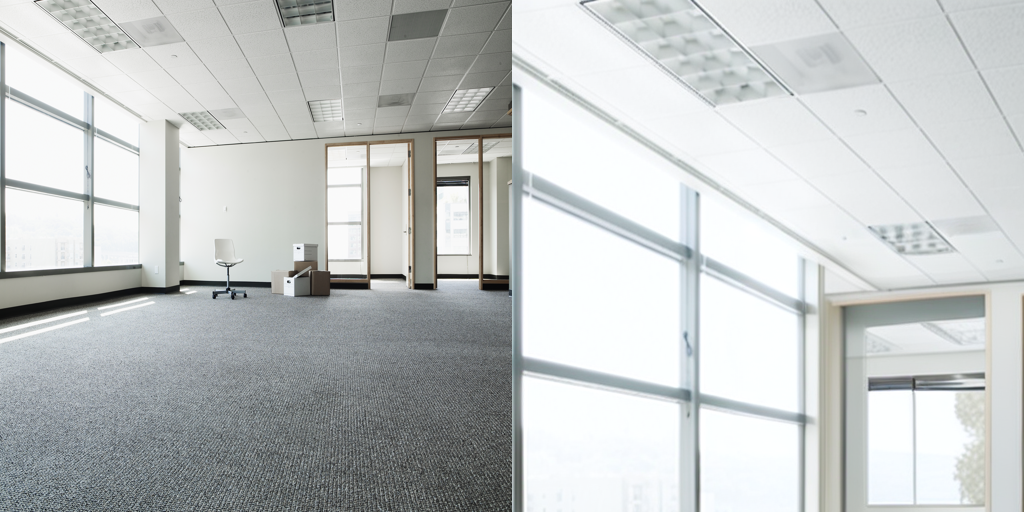

In [99]:
generator = torch.Generator("cuda").manual_seed(92)
prompt = "Office with 3 desks and pool table"
# negative_prompt = "changing image background"
#  strength=0.7, guidance_scale=12.5
image = pipeline(
    prompt=prompt, image=init_image, mask_image=mask_image, generator=generator
).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

In [6]:
import requests

In [ ]:
files = [
    ("images", ("image.jpg", open("image.jpg", "rb"), "image/jpeg")),
]

data = [
    ("prompts", "Desk and pool table"),
]

response = requests.post(
    "http://127.0.0.1:8000/process-images", files=files, data=data
)

{'results': [{'image': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAEAAElEQVR4nFT9ebBtaXYXBv7W8O19zrn3vjnz5ViZWVVZlTWrNJYmCglBRDdqdwQYwnaEGwTCAbLaYuwmIBhMg2jAGAwChGno7ugI/2FHt91BuN2GxlgDWEiqKqlUqnnMrBwq82XmG+495+zvW0P/sfZ97s6IjMzIPPe+c87ee31r/aZFd9++Q8meBE5kAkCCKAGAiED4//8rH/4zAUL9Xa/MBIgywsxA7OFh3sfy6hd/7d5X/s2D11783Kc//y8//y20J77r9/7bP/qjv2uno3EqizZCRGb2pUdEZI7RhXn4OB76xf6iHy6uXjudtzuRzeGwRMA85rndv//ALZflAAQBw/rJyXZukyrNU8tIN9J5s9nu5qaRjsyHbxgJYjAhg3QW6/2//K/+6a/+/K/8hb/yk9/57d/55sXS97ksnci0CXNmMiiFKTy53m9EBIDMDABmwcKIiExiYuYEECBhWwY3cXMRjgAx2xj1YhBHZCJFOMNF1c1ZJDPczMYgJiKODCaEObGERxIDmQFmNrP96J/6lV/++G/9OFE7HA5TExJCODFlBjIjwEzhkQARERMSzAwAoIggIBEAE7FHECVAEU4gYs6MsGCVMZbWGkDu0Zr2ZWERZIIIIHcXZiAzwcIRCSQBAaQHmJEgYg9HRGS89NLXX/nGV3/oh35k30cmCIR0MDFRfbNElJmZAIiFI8LNI4JFIqO+AUIC9dESuf4IQIkkgJmZWVSoPhJRRIyxZCAymOrTgYDITI8kEmZkAFDhTCQoIkFB4Qned/sv/uv/9rs/8l3Xbl35a3/lp69daT/+h//w228/iDBbFo8YbmbhSz8c97vTM9FpmubhIyInJQKI+HhclmVEGMVoKp6UCfNUFmSoqNmiKiziGYzmMeZpa24Q3m1OHly8fVyOAhJVgHmaRQVJY3Qf

In [ ]:
import base64
from io import BytesIO
from PIL import Image

def base64_to_image(base64_str: str) -> Image.Image:
    image_data = base64.b64decode(base64_str)
    return Image.open(BytesIO(image_data))

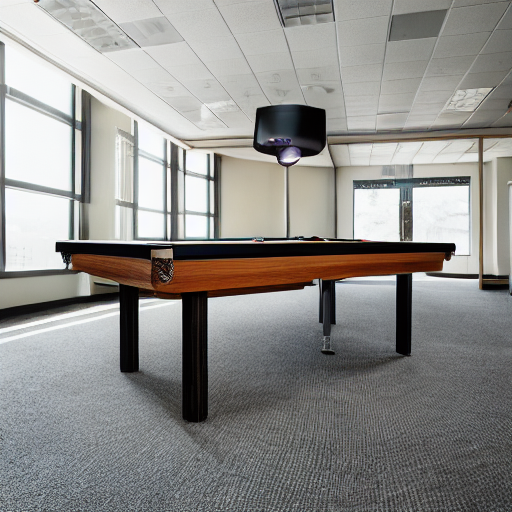

In [21]:
img = base64_to_image(response.json()["results"][0]["image"])
img
